In [103]:
import pandas as pd
import sqlite3
import kaggle
import os
import matplotlib.pyplot as plt
import plotly.express as px
from   plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
import seaborn as sns


In [104]:
from ETLPipeline import SP500ETL

# Running the ETL pipeline
etl = SP500ETL()
sp500_companies_data, sp500_index_data, db_name, table_name1, table_name2 = etl.execute_etl('../data/sp500_data.db', 'sp500_companies')


Dataset URL: https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks


2024-11-27 16:36:35,084 - INFO - Data from sp500_companies.csv downloaded and loaded into DataFrame.
2024-11-27 16:36:35,086 - INFO - Data transformation complete for first dataset.
2024-11-27 16:36:35,097 - INFO - Data saved to table 'sp500_companies' in database '../data/sp500_data.db'.


Dataset URL: https://www.kaggle.com/datasets/paveljurke/s-and-p-500-gspc-historical-data


2024-11-27 16:36:36,724 - INFO - Data from sap500.csv downloaded and loaded into DataFrame.
/Users/umair/Downloads/bilal_files/WS2024-25-MADE/project/ETLPipeline.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  'Date': 'date',
2024-11-27 16:36:36,731 - INFO - Data transformation complete for second dataset.
2024-11-27 16:36:36,776 - INFO - Data saved to table 'sp500_stocksprice_and_volume' in database '../data/sp500_data.db'.
2024-11-27 16:36:36,777 - INFO - ETL process successfully completed for both datasets.


In [105]:
sp500_companies_data.head(10)

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap_in_Billions,Ebitda_in_Billions,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,235.06,3553.1,134.7,0.061,Cupertino,CA,United States,164000,"Apple Inc. designs, manufactures, and markets ...",0.06
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,136.92,3353.2,61.2,1.224,Santa Clara,CA,United States,29600,NVIDIA Corporation provides graphics and compu...,0.06
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,427.99,3182.1,136.6,0.160,Redmond,WA,United States,228000,Microsoft Corporation develops and supports so...,0.06
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,207.86,2185.6,111.6,0.110,Seattle,WA,United States,1551000,"Amazon.com, Inc. engages in the retail sale of...",0.04
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,169.12,2080.1,123.5,0.151,Mountain View,CA,United States,181269,Alphabet Inc. offers various products and plat...,0.04
5,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,170.62,2076.5,123.5,0.151,Mountain View,CA,United States,181269,Alphabet Inc. offers various products and plat...,0.04
6,NMS,META,"Meta Platforms, Inc.","Meta Platforms, Inc.",Communication Services,Internet Content & Information,573.54,1447.9,79.2,0.189,Menlo Park,CA,United States,72404,"Meta Platforms, Inc. engages in the developmen...",0.03
7,NMS,TSLA,"Tesla, Inc.","Tesla, Inc.",Consumer Cyclical,Auto Manufacturers,338.23,1085.7,13.2,0.078,Austin,TX,United States,140473,"Tesla, Inc. designs, develops, manufactures, l...",0.02
8,NYQ,BRK-B,Berkshire Hathaway Inc. New,Berkshire Hathaway Inc.,Financial Services,Insurance - Diversified,478.56,1032.1,149.5,-0.002,Omaha,NE,United States,396500,"Berkshire Hathaway Inc., through its subsidiar...",0.02
9,NMS,AVGO,Broadcom Inc.,Broadcom Inc.,Technology,Semiconductors,164.74,769.4,23.0,0.164,Palo Alto,CA,United States,20000,"Broadcom Inc. designs, develops, and supplies ...",0.01


In [123]:
import dataframe_image as dfi

# Save the table as an image
dfi.export(sp500_index_data.head(10), 'sp500index_table.png')


/var/folders/x2/245pv46138sdyrqp9lm1nhjr0000gn/T/ipykernel_94057/3853517377.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_counts.index, y=sector_counts.values, palette='viridis')


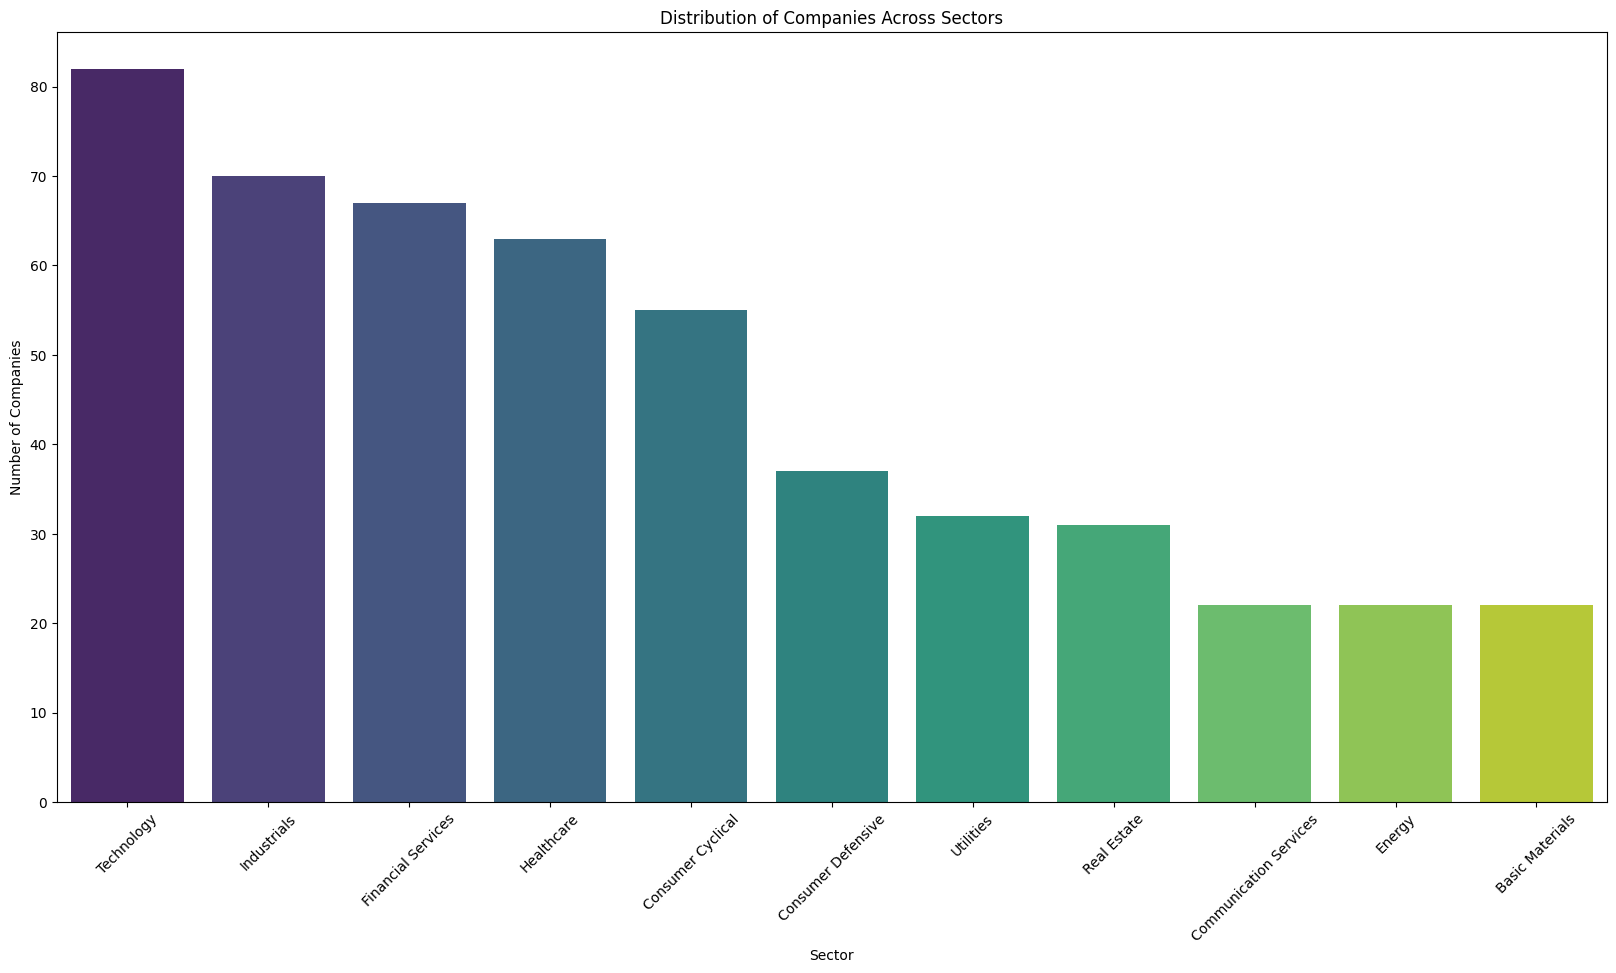

In [106]:
# Updated code with renamed columns for Marketcap and Ebitda

# 1. Distribution of Companies Across Sectors
plt.figure(figsize=(20, 10))
sector_counts = sp500_companies_data['Sector'].value_counts()
sns.barplot(x=sector_counts.index, y=sector_counts.values, palette='viridis')
plt.title('Distribution of Companies Across Sectors')
plt.xlabel('Sector')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.show()



/var/folders/x2/245pv46138sdyrqp9lm1nhjr0000gn/T/ipykernel_94057/3222239947.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Longname', y='Marketcap_in_Billions', data=top_10_marketcap, palette='plasma')


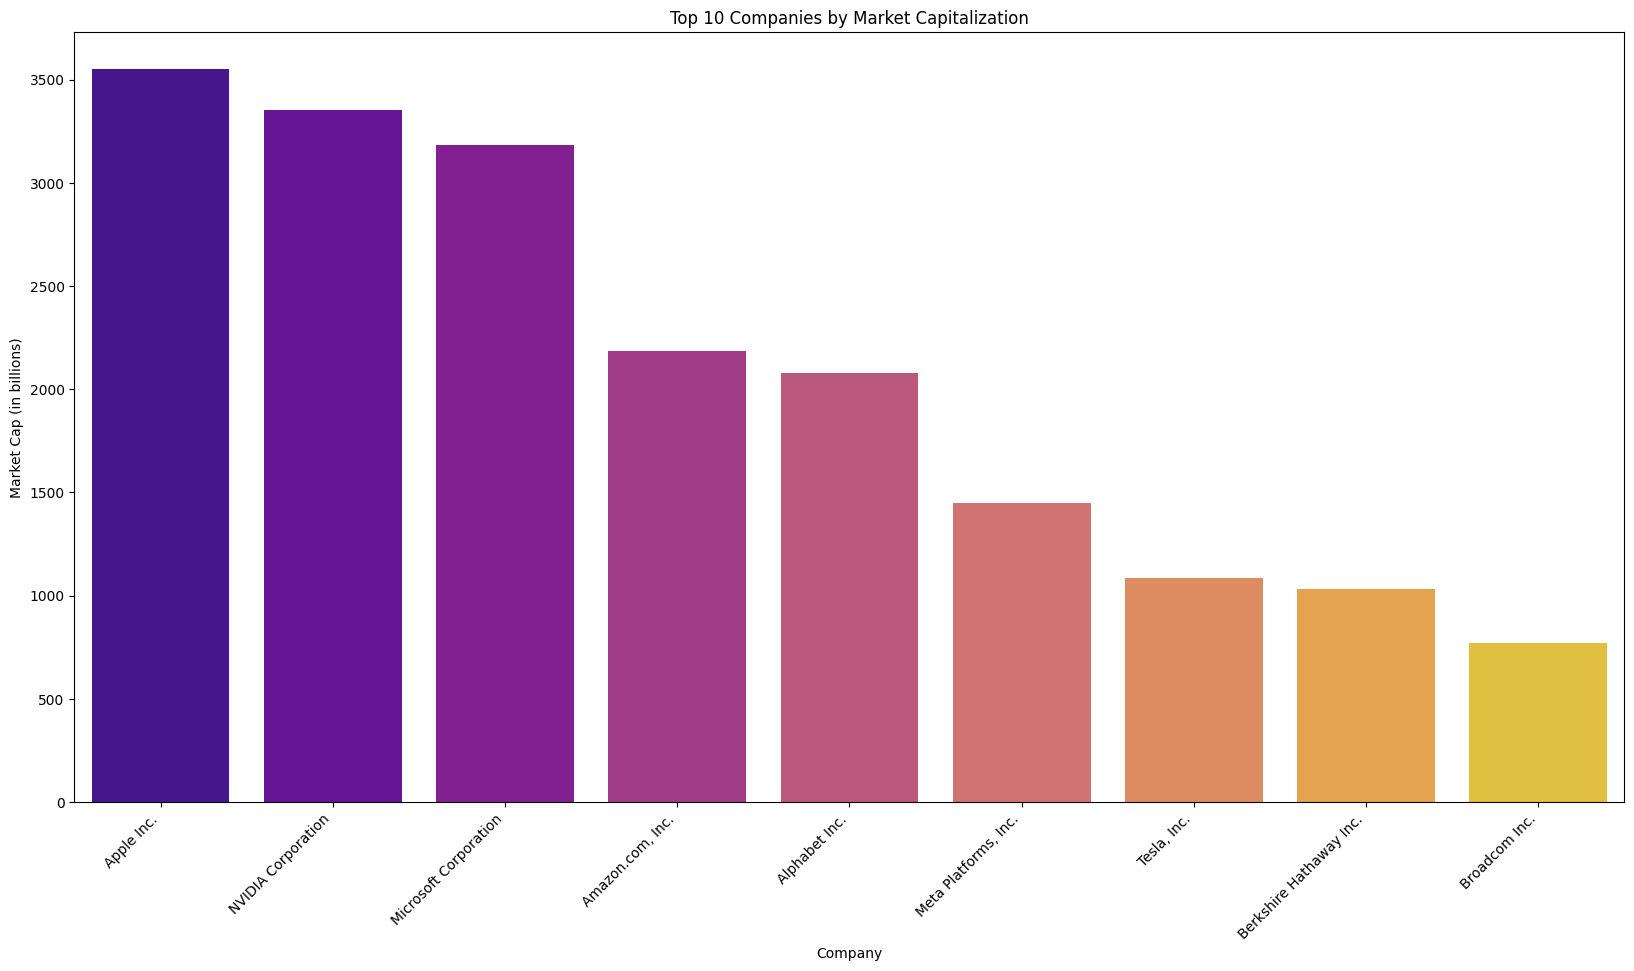

In [107]:
# 2. Top 5 Companies by Market Capitalization
plt.figure(figsize=(20, 10))
top_10_marketcap = sp500_companies_data.nlargest(10, 'Marketcap_in_Billions')
sns.barplot(x='Longname', y='Marketcap_in_Billions', data=top_10_marketcap, palette='plasma')
plt.title('Top 10 Companies by Market Capitalization')
plt.xlabel('Company')
plt.ylabel('Market Cap (in billions)')
plt.xticks(rotation=45, ha='right')
plt.show()



/var/folders/x2/245pv46138sdyrqp9lm1nhjr0000gn/T/ipykernel_94057/3040402785.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sector', y='Revenuegrowth', data=sp500_companies_data, palette='Set3')


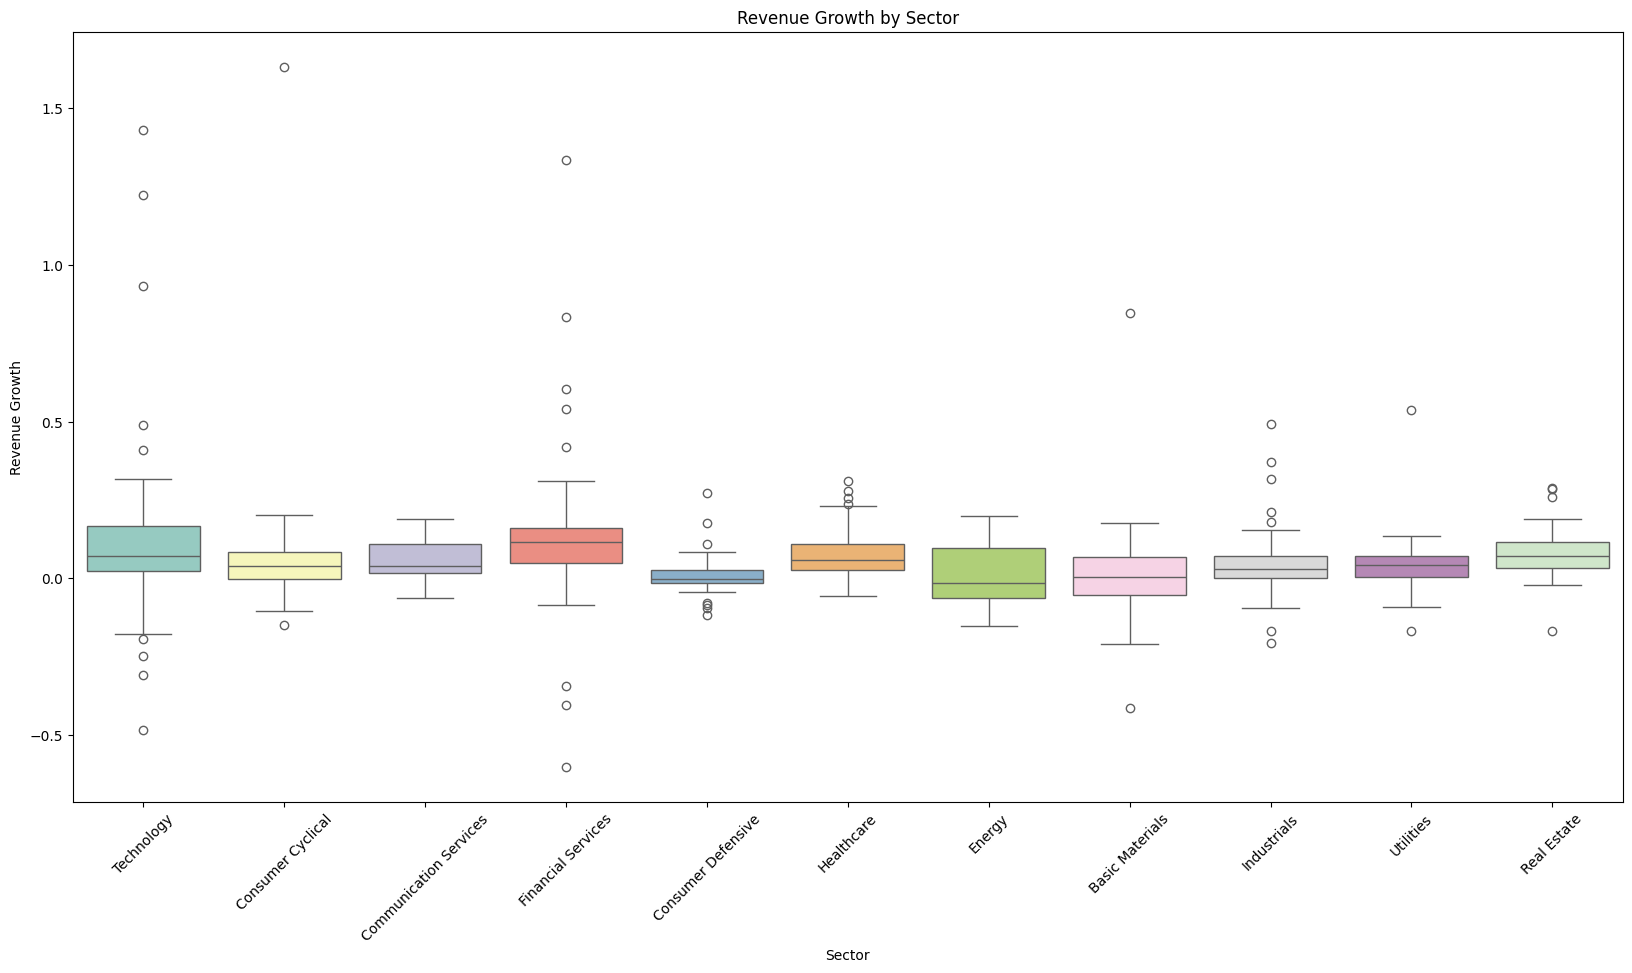

In [108]:
# 3. Revenue Growth by Sector
plt.figure(figsize=(20, 10))
sns.boxplot(x='Sector', y='Revenuegrowth', data=sp500_companies_data, palette='Set3')
plt.title('Revenue Growth by Sector')
plt.xlabel('Sector')
plt.ylabel('Revenue Growth')
plt.xticks(rotation=45)
plt.show()



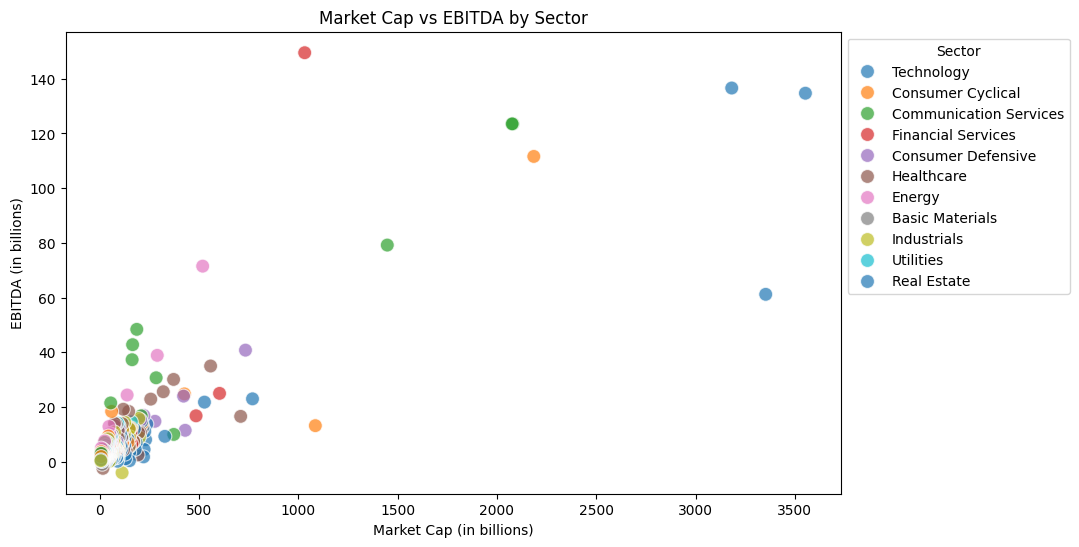

In [109]:
# 4. Relationship Between Market Cap and EBITDA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Marketcap_in_Billions', y='Ebitda_in_Billions', data=sp500_companies_data, hue='Sector', palette='tab10', s=100, alpha=0.7)
plt.title('Market Cap vs EBITDA by Sector')
plt.xlabel('Market Cap (in billions)')
plt.ylabel('EBITDA (in billions)')
plt.legend(title='Sector', bbox_to_anchor=(1, 1))
plt.show()



/var/folders/x2/245pv46138sdyrqp9lm1nhjr0000gn/T/ipykernel_94057/3389031362.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sector', y='Fulltimeemployees', data=sp500_companies_data, palette='coolwarm')


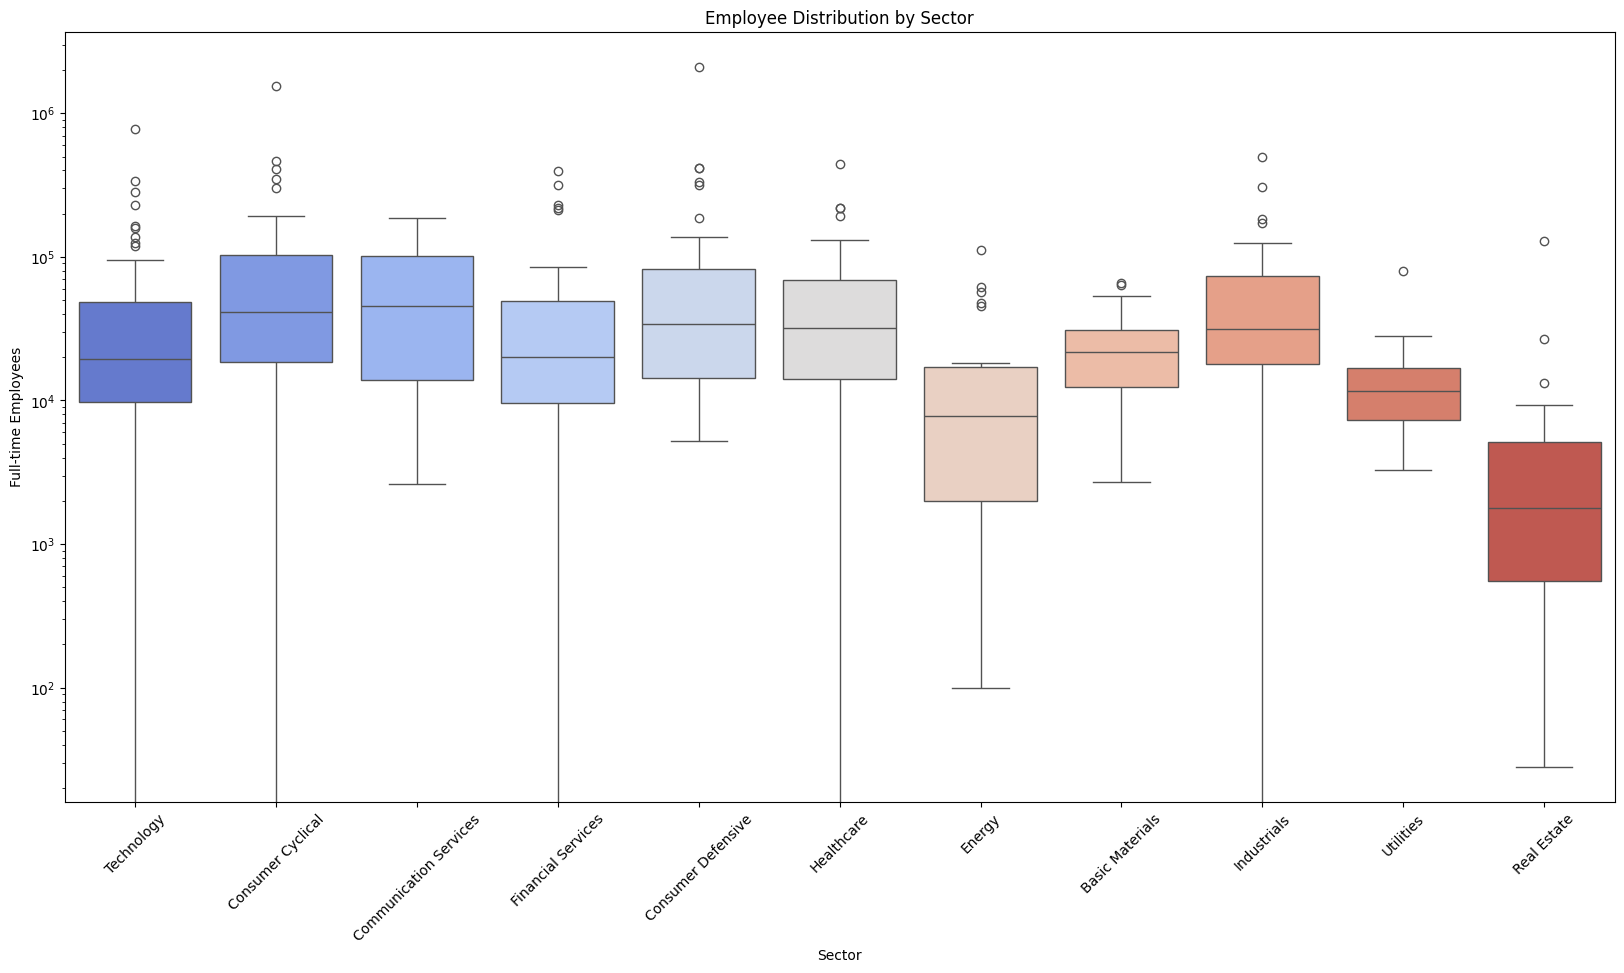

In [110]:
# 5. Employee Distribution by Sector
plt.figure(figsize=(20, 10))
sns.boxplot(x='Sector', y='Fulltimeemployees', data=sp500_companies_data, palette='coolwarm')
plt.title('Employee Distribution by Sector')
plt.xlabel('Sector')
plt.ylabel('Full-time Employees')
plt.yscale('log')  # Log scale to handle wide variations
plt.xticks(rotation=45)
plt.show()


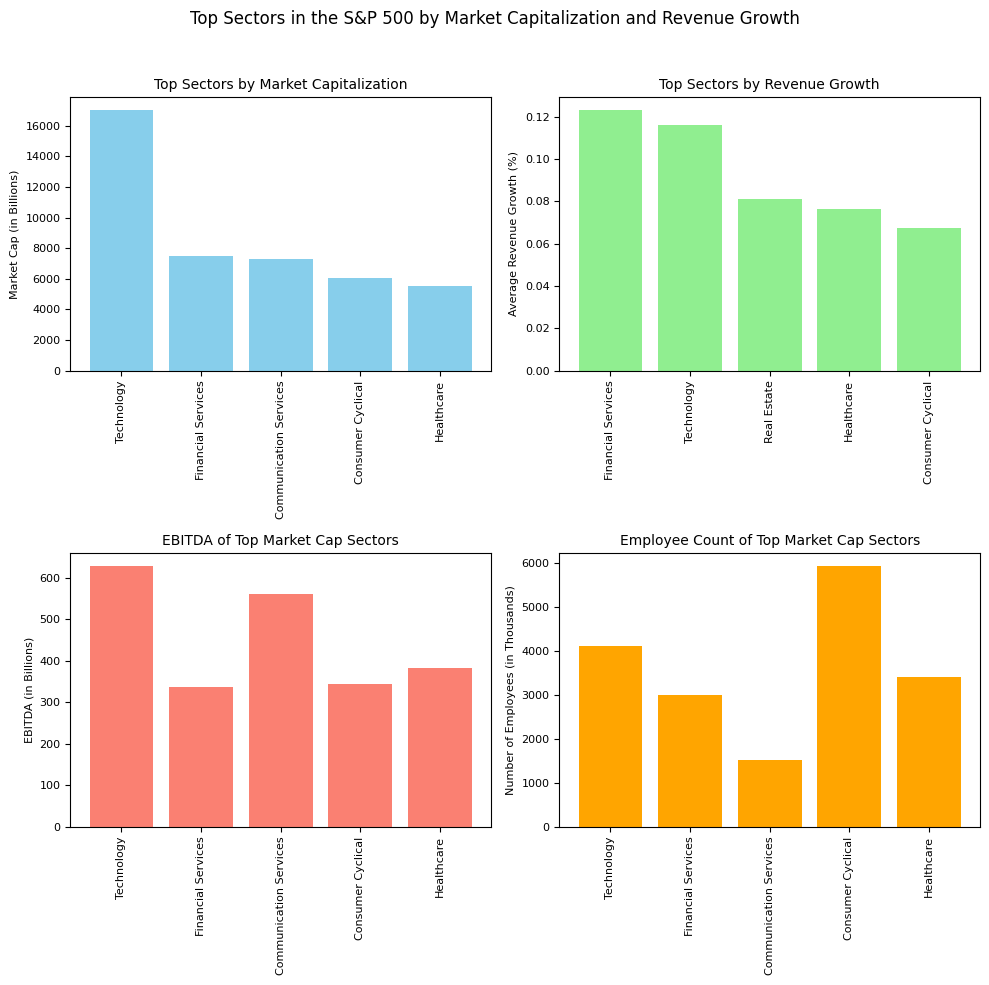

In [111]:


# 1. Aggregate Data by Sector
sector_agg = sp500_companies_data.groupby('Sector').agg({
    'Marketcap_in_Billions': 'sum',
    'Revenuegrowth': 'mean',
    'Ebitda_in_Billions': 'sum',
    'Fulltimeemployees': 'sum'
}).reset_index()

# 2. Identify Top Sectors
# Sort sectors by Marketcap and Revenuegrowth
top_marketcap_sectors = sector_agg.sort_values(by='Marketcap_in_Billions', ascending=False).head(5)
top_revenuegrowth_sectors = sector_agg.sort_values(by='Revenuegrowth', ascending=False).head(5)

# 3. Visualize the Data

# Set up the plotting area
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Top Sectors in the S&P 500 by Market Capitalization and Revenue Growth', fontsize=12)

# Bar plot for Market Capitalization
axes[0, 0].bar(top_marketcap_sectors['Sector'], top_marketcap_sectors['Marketcap_in_Billions'], color='skyblue')
axes[0, 0].set_title('Top Sectors by Market Capitalization', fontsize=10)
axes[0, 0].set_ylabel('Market Cap (in Billions)', fontsize=8)
axes[0, 0].tick_params(axis='x', rotation=90, labelsize=8)
axes[0, 0].tick_params(axis='y', labelsize=8)

# Bar plot for Revenue Growth
axes[0, 1].bar(top_revenuegrowth_sectors['Sector'], top_revenuegrowth_sectors['Revenuegrowth'], color='lightgreen')
axes[0, 1].set_title('Top Sectors by Revenue Growth', fontsize=10)
axes[0, 1].set_ylabel('Average Revenue Growth (%)', fontsize=8)
axes[0, 1].tick_params(axis='x', rotation=90, labelsize=8)
axes[0, 1].tick_params(axis='y', labelsize=8)

# Bar plot for EBITDA of top Market Cap sectors
axes[1, 0].bar(top_marketcap_sectors['Sector'], top_marketcap_sectors['Ebitda_in_Billions'], color='salmon')
axes[1, 0].set_title('EBITDA of Top Market Cap Sectors', fontsize=10)
axes[1, 0].set_ylabel('EBITDA (in Billions)', fontsize=8)
axes[1, 0].tick_params(axis='x', rotation=90, labelsize=8)
axes[1, 0].tick_params(axis='y', labelsize=8)

# Bar plot for Employee Count of top Market Cap sectors
axes[1, 1].bar(top_marketcap_sectors['Sector'], top_marketcap_sectors['Fulltimeemployees'] / 1e3, color='orange')
axes[1, 1].set_title('Employee Count of Top Market Cap Sectors', fontsize=10)
axes[1, 1].set_ylabel('Number of Employees (in Thousands)', fontsize=8)
axes[1, 1].tick_params(axis='x', rotation=90, labelsize=8)
axes[1, 1].tick_params(axis='y', labelsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [112]:
sp500_index_data.head()

,date,open_price($),high_price($),low_price($),close_price($),volume
5496,1950-01-03,16.66,16.66,16.66,16.66,1260000
5497,1950-01-04,16.85,16.85,16.85,16.85,1890000
5498,1950-01-05,16.93,16.93,16.93,16.93,2550000
5499,1950-01-06,16.98,16.98,16.98,16.98,2010000
5500,1950-01-09,17.08,17.08,17.08,17.08,2520000


/var/folders/x2/245pv46138sdyrqp9lm1nhjr0000gn/T/ipykernel_94057/435786381.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data_final = filtered_sp500_index_data.resample('M', on='date').mean()


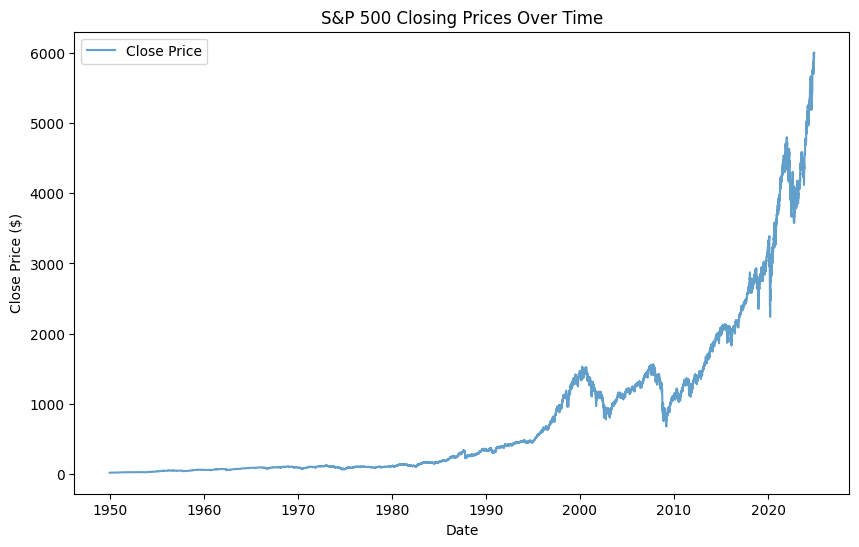

In [113]:
# Ensure 'date' is in datetime format
sp500_index_data['date'] = pd.to_datetime(sp500_index_data['date'])

# Filter out rows with zero volume for meaningful analysis
filtered_sp500_index_data = sp500_index_data[sp500_index_data['volume'] > 0]

# Resample to monthly averages for smoother trends
monthly_data_final = filtered_sp500_index_data.resample('M', on='date').mean()

# Visualization 1: Closing Prices Over Time
plt.figure(figsize=(10, 6))
plt.plot(sp500_index_data['date'], sp500_index_data['close_price($)'], label='Close Price', alpha=0.7)
plt.title('S&P 500 Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.show()

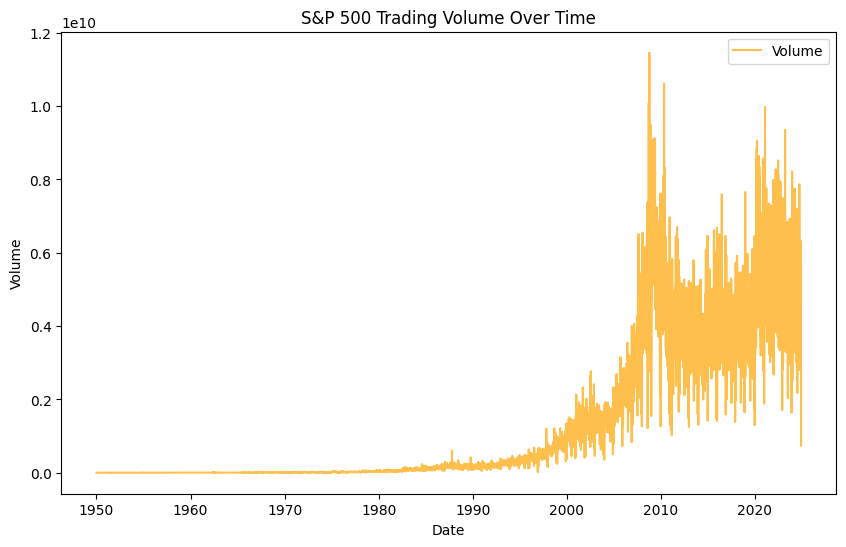

In [114]:
# Visualization 2: Volume Trend Over Time
plt.figure(figsize=(10, 6))
plt.plot(filtered_sp500_index_data['date'], filtered_sp500_index_data['volume'], color='orange', label='Volume', alpha=0.7)
plt.title('S&P 500 Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

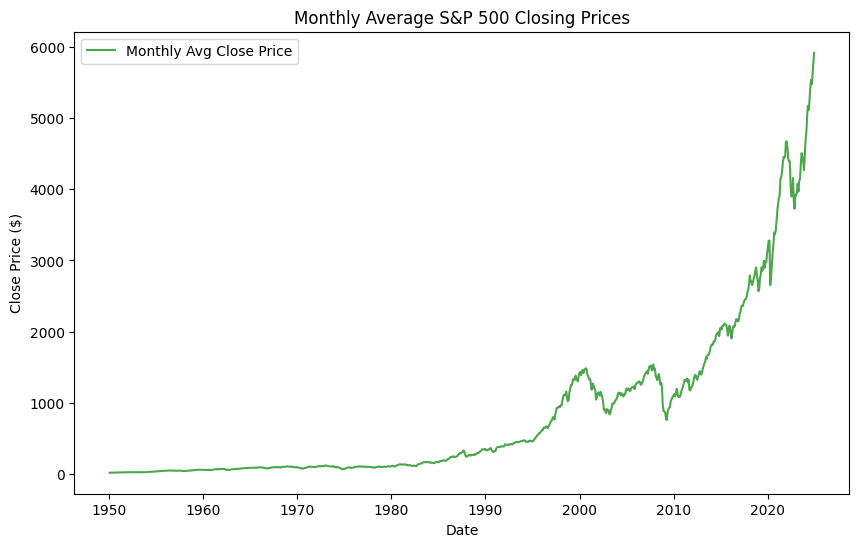

In [115]:
# Visualization 3: Monthly Average Closing Prices
plt.figure(figsize=(10, 6))
plt.plot(monthly_data_final.index, monthly_data_final['close_price($)'], color='green', label='Monthly Avg Close Price', alpha=0.7)
plt.title('Monthly Average S&P 500 Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.show()

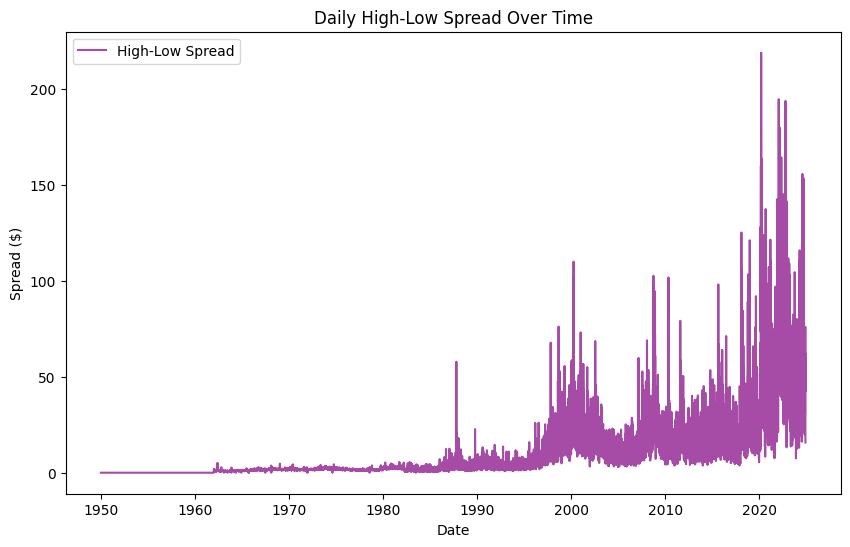

In [116]:
# Visualization 4: High-Low Spread Over Time
filtered_sp500_index_data['High_Low_Spread'] = filtered_sp500_index_data['high_price($)'] - filtered_sp500_index_data['low_price($)']
plt.figure(figsize=(10, 6))
plt.plot(filtered_sp500_index_data['date'], filtered_sp500_index_data['High_Low_Spread'], color='purple', label='High-Low Spread', alpha=0.7)
plt.title('Daily High-Low Spread Over Time')
plt.xlabel('Date')
plt.ylabel('Spread ($)')
plt.legend()
plt.show()

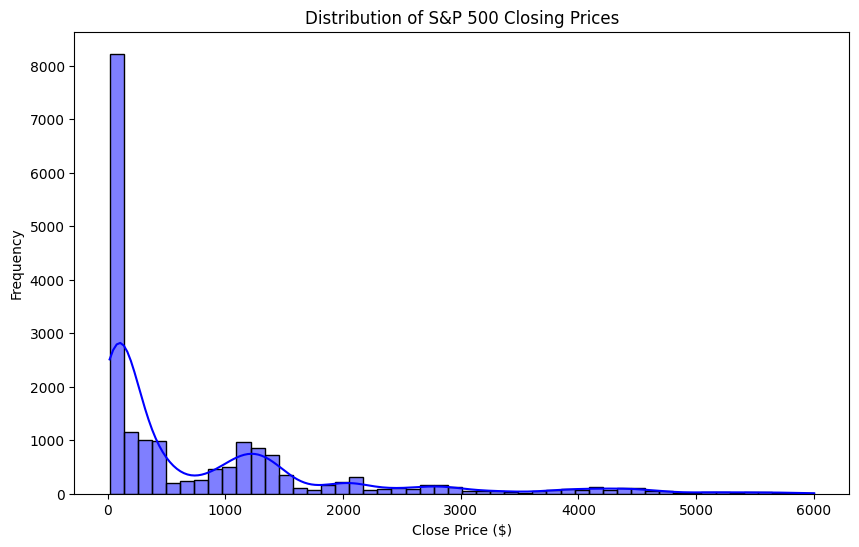

In [117]:
# Visualization 5: Distribution of Closing Prices
plt.figure(figsize=(10, 6))
sns.histplot(filtered_sp500_index_data['close_price($)'], kde=True, color='blue', bins=50)
plt.title('Distribution of S&P 500 Closing Prices')
plt.xlabel('Close Price ($)')
plt.ylabel('Frequency')
plt.show()

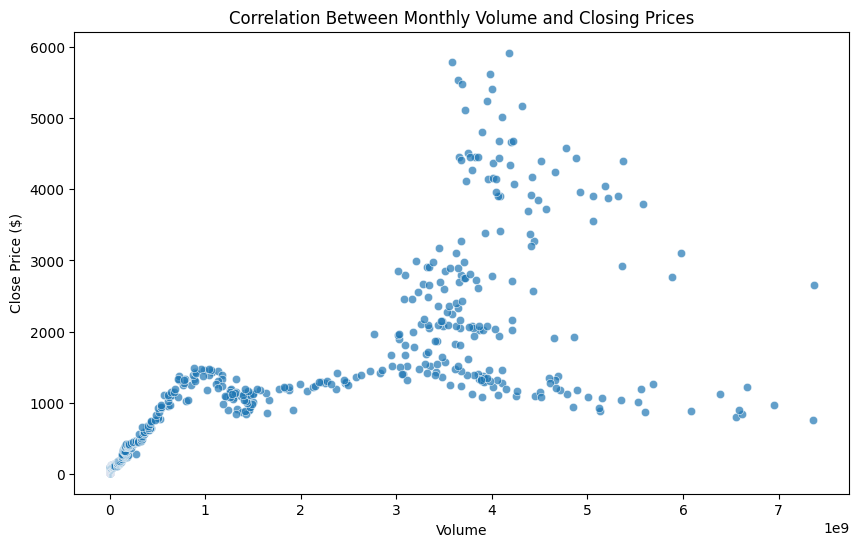

In [118]:
# Visualization 6: Monthly Volume and Close Price Correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=monthly_data_final['volume'], y=monthly_data_final['close_price($)'], alpha=0.7)
plt.title('Correlation Between Monthly Volume and Closing Prices')
plt.xlabel('Volume')
plt.ylabel('Close Price ($)')
plt.show()